In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import re
from matplotlib.ticker import PercentFormatter

df = pd.read_csv("../datasets/USvideos.csv")
with open("../datasets/US_category_id.json") as f:
    category_data = json.load(f)

category_mapping = {
    int(item["id"]): item["snippet"]["title"]
    for item in category_data["items"]
}
df["category"] = df["category_id"].map(category_mapping)

#data cleaning and formatting
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df.drop_duplicates(subset=['video_id', 'trending_date'], inplace=True)
df.dropna(inplace=True)

#### Which types of videos go viral most often?

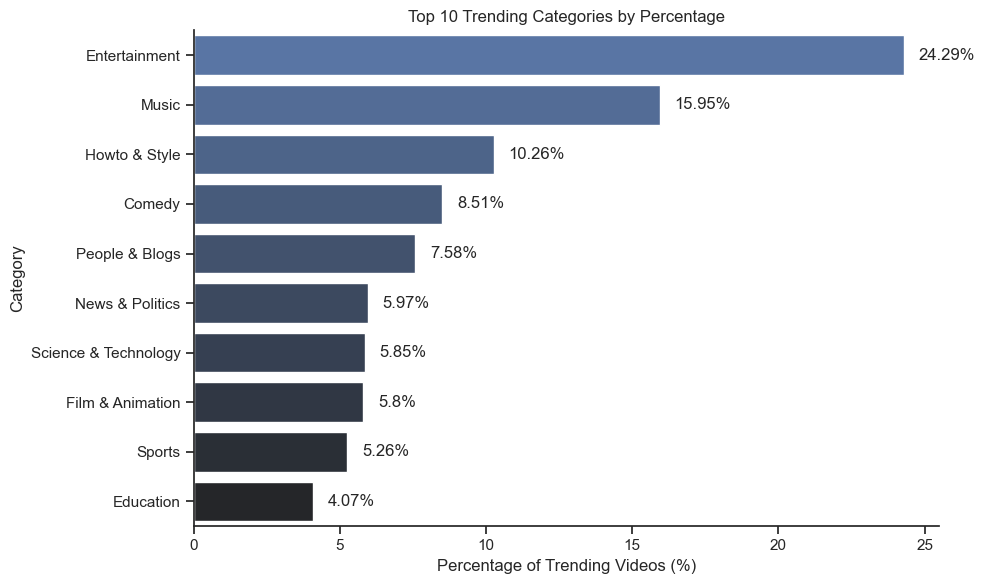

In [4]:
category_percent = (df['category'].value_counts(normalize=True) * 100).round(2).head(10).reset_index()

# Rename columns for clarity
category_percent.columns = ['category', 'percent']

sns.set_theme(style='ticks')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=category_percent, x='percent', y='category',hue='category', palette='dark:b_r', legend=False)

sns.despine(right=True)

# Add title and labels
ax.set_title('Top 10 Trending Categories by Percentage')
ax.set_xlabel('Percentage of Trending Videos (%)')
ax.set_ylabel('Category')

# Annotate each bar with percentage value
for i, row in category_percent.iterrows():
    ax.text(row['percent'] + 0.5, i, f"{row['percent']}%", va='center')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Most Common Trending Categories'}, xlabel='category'>

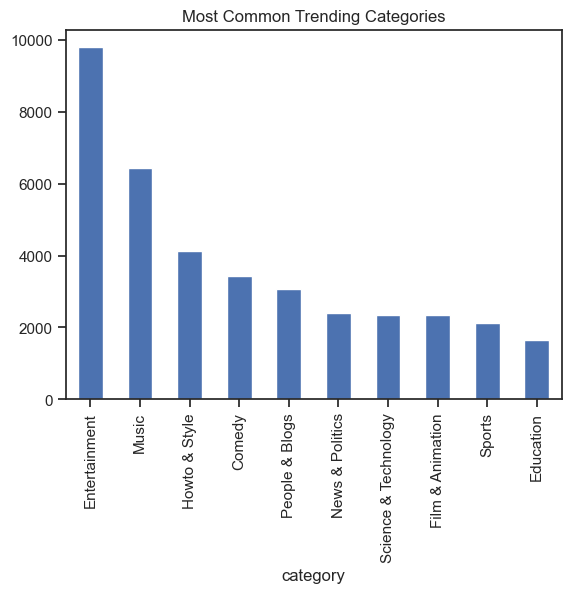

In [ ]:
top_categories = df['category'].value_counts().head(10)
top_categories.plot(kind='bar', title='Most Common Trending Categories')

####  2. What are the most common tags or words in viral titles?

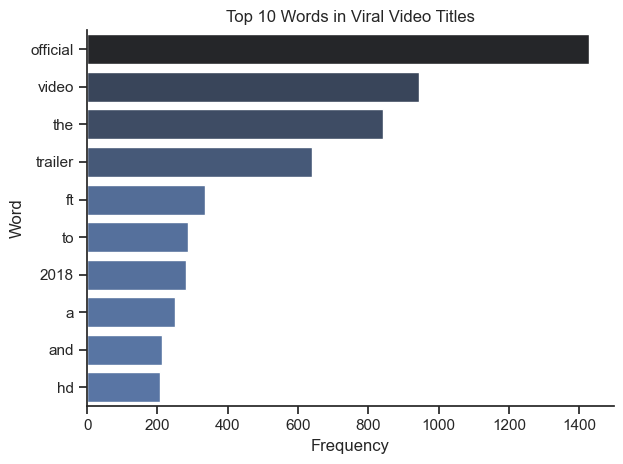

In [17]:
# Filter top 10% most viewed videos (you can adjust threshold)
viral_videos = df[df['views'] > df['views'].quantile(0.90)]

# Clean and tokenize titles
def tokenize(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower().split()

all_words = []
for title in viral_videos['title'].dropna():
    all_words.extend(tokenize(title))

# Count most frequent words
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)

# Convert to DataFrame
word_df = pd.DataFrame(common_words, columns=['word', 'count'])
sns.set_theme(style='ticks')

plt.figure()
sns.barplot(data=word_df, y='word', x='count', hue='count', palette='dark:b_r', legend=False)
plt.title("Top 10 Words in Viral Video Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
sns.despine()
plt.show()

#### 3. What is the average engagement rate (likes + comments)?

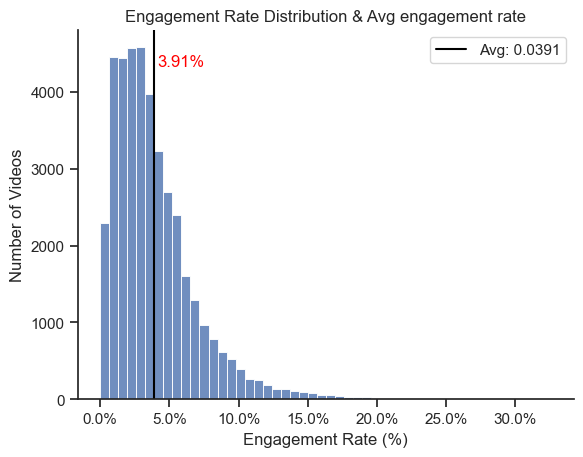

In [61]:
df['engagement'] = (df['likes'] + df['comment_count']) / df['views']
df = df[df['engagement'].notna() & (df['views'] > 0)]
avg_engagement = df['engagement'].mean()

sns.set_theme(style='ticks')
sns.histplot(df['engagement'], bins=50, alpha=0.8)
sns.despine()

plt.axvline(avg_engagement, color='black', linestyle='-', label=f'Avg: {avg_engagement:.4f}')
plt.text(avg_engagement + 0.002, plt.ylim()[1] * 0.9, f'{avg_engagement:.2%}', color='red')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Engagement Rate (%)')
plt.ylabel('Number of Videos')
plt.legend()
plt.title('Engagement Rate Distribution & Avg engagement rate')
plt.show()

####  4. Which categories trend the most?

<Axes: xlabel='category'>

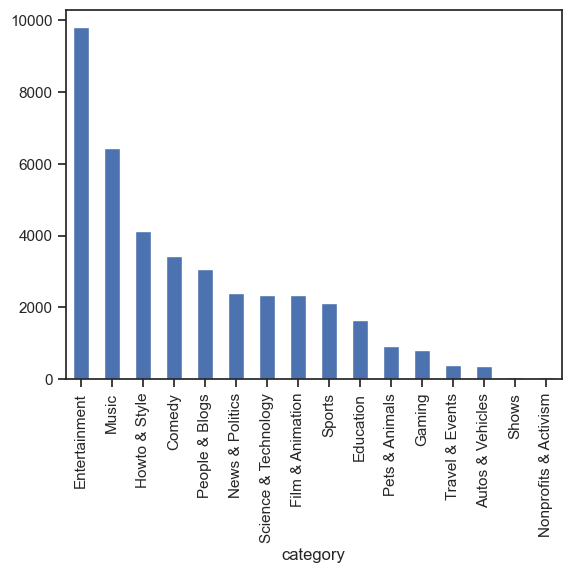

In [62]:
df['category'].value_counts().plot(kind='bar')